<a href="https://colab.research.google.com/github/Mckenz31/final_yr_proj/blob/main/final_year_proj_FA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jun  7 16:01:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [5]:
import matplotlib.pyplot as plt
import datetime

INPUT_SHAPE = (224, 224, 3)
IMAGE_SIZE = (224, 224)

In [ ]:
# Using Tensorflow Datasets to Download Data
import tensorflow_datasets as tfds

In [ ]:
# List available datasets

datasets = tfds.list_builders()
datasets

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
print("stanford_online_products" in datasets)

True


In [ ]:
(train_data, test_data), ds_info = tfds.load(
    name = "stanford_online_products",
    split = ["test", "train"],
    shuffle_files = True,
    as_supervised = False,
    with_info = True
)

In [ ]:
ds_info.features

FeaturesDict({
    'class_id': ClassLabel(shape=(), dtype=tf.int64, num_classes=22634),
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'super_class_id': ClassLabel(shape=(), dtype=tf.int64, num_classes=12),
    'super_class_id/num': ClassLabel(shape=(), dtype=tf.int64, num_classes=12),
})

In [ ]:
class_names = ds_info.features["super_class_id"].names
class_names

['bicycle',
 'cabinet',
 'chair',
 'coffee_maker',
 'fan',
 'kettle',
 'lamp',
 'mug',
 'sofa',
 'stapler',
 'table',
 'toaster']

In [ ]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset element_spec={'class_id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'super_class_id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
for element_spec in train_one_sample:
  print(f"Image shape: {element_spec['image'].shape}")
  print(f"Image shape: {element_spec['image'].dtype}")
  print(f"Target class: {element_spec['super_class_id']}" )
  print(f"Target class name:  {class_names[element_spec['super_class_id']]}")

Image shape: (400, 400, 3)
Image shape: <dtype: 'uint8'>
Target class: 10
Target class name:  table


In [ ]:
element_spec['image']

<tf.Tensor: shape=(400, 400, 3), dtype=uint8, numpy=
array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 25

In [ ]:
image = element_spec["image"]

In [ ]:
label = class_names[element_spec['super_class_id']]
label

'table'

In [ ]:
#Min and mac values
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 399.5, 399.5, -0.5)

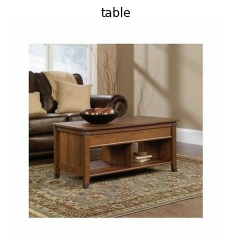

In [ ]:
# Plot the image

plt.imshow(image)
plt.title(class_names[element_spec['super_class_id']])
plt.axis(False)

# Processing our data

Our dataset [Todo]

- It is in unit8 -> needs to be converted to float32
- Different sized images -> need to make them uniform
- Not scaled (0-255) -> Scaled (0-1)

In [ ]:
print(f"Image before preprocessing:\n {element_spec['image'][:3]}...,\nShape: {element_spec['image'].shape},\nDatatype: {element_spec['image'].dtype}\n")

Image before preprocessing:
 [[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]...,
Shape: (400, 400, 3),
Datatype: <dtype: 'uint8'>



In [ ]:
def preprocess_img(element_spec):

  element_spec['image'] = tf.image.resize(element_spec['image'], [224, 224])
  tf.cast(element_spec['image'], tf.float32), 
  return element_spec

In [ ]:
preprocessed_img = preprocess_img(element_spec)
print(f"Image after preprocessing:\n {preprocessed_img['image'][:3]}...,\nShape: {preprocessed_img['image'].shape},\nDatatype: {preprocessed_img['image'].dtype}")

Image after preprocessing:
 [[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


(-0.5, 223.5, 223.5, -0.5)

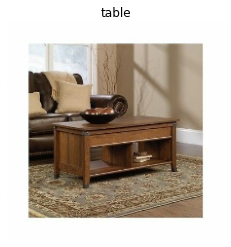

In [ ]:
plt.imshow(preprocessed_img['image']/255)
plt.title(label)
plt.axis(False)

Original dataset (e.g. train_data) -> map() -> shuffle() -> batch() -> prefetch() -> PrefetchDataset

In [ ]:
# Map preprocessing function
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)

train_data = train_data.shuffle(buffer_size=1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

'''
num_parallel_calls = tf.data.AUTOTUNE -> this is done for prefetching
Prefetching is done such that - while the GPU works on the data, the CPU does
not remain idle but rather prepares the next set of data.
This way, the entire process of preparing and using data happens concurrently,
thus saving lots of time
'''

test_data = test_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)

test_data = test_data.batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec={'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>,
 <PrefetchDataset element_spec={'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>)

In [ ]:
# Mixed precision

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

# Create modelling callbacks

In [10]:
# Tensorboard callback
def tensorboard_callback(dir_name, exp_name):

  log_dir = dir_name + '/' + exp_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callbac = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )

  return tensorboard_callbac

# ModelCheckpoint callback

checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved 

# EFFICIENTNET B0

## Feature extraction

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Functional layers
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
x = tf.keras.layers.Dense(len(class_names))(x)

outputs = tf.keras.layers.Activation("softmax", dtype = tf.float32, name="softmax_output_float32")(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense_1 (Dense)             (None, 12)                15372     
                                                                 
 softmax_output_float32 (Act  (None, 12)               0         
 ivation)                                                        
                                                                 
Total params: 4,064,943
Trainable params: 15,372
Non-traina

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_output_float32 True float32 <Policy "float32">


In [ ]:
len(train_data)

1891

In [ ]:
train_data

<PrefetchDataset element_spec={'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [ ]:
train_data.element_spec

{'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}

In [ ]:
dictValue = train_data.element_spec
ls = []
ls.append(dictValue["class_id"])
ls.append(dictValue["image"])
ts = tuple(ls)
ts

(TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None))

In [ ]:
len(ts)

2

In [ ]:
# Fit the model with callbacks
history_B0 = model.fit(
    train_data, 
    epochs=3,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(len(test_data)),
)

Epoch 1/3


ValueError: ignored

# Custom Model

In [23]:
train_dir = "/content/drive/MyDrive/Final yr proj/dataset_C1/train"
test_dir = "/content/drive/MyDrive/Final yr proj/dataset_C1/test"

In [48]:
# Resize image, shuffle

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, 
    label_mode = "categorical",
    image_size = (224, 224),
    shuffle = True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, 
    label_mode = "categorical",
    image_size = (224, 224),
    shuffle = False
)

Found 250 files belonging to 5 classes.
Found 50 files belonging to 5 classes.


In [49]:
# Data Augmentation

data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
], name="C1_data_augmentation_layer")

In [54]:
## Model

C1_base_model = tf.keras.applications.EfficientNetB0(include_top=False)
C1_base_model.trainable = False

C1_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="C1_input_layer")

C1_x = data_augmentation(C1_input_layer)
C1_x = C1_base_model(C1_x, training=False)
C1_x = tf.keras.layers.GlobalAveragePooling2D(name="C1_pooling_layer")(C1_x)

C1_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C1_output_dense_layer")(C1_x)

C1_model = tf.keras.Model(C1_input_layer, C1_output_layer)

In [55]:
C1_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [45]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [46]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [56]:
C1_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1",
        ),
        model_checkpoint
    ]
)

Epoch 1/5
8/8 [==============================] - 34s 3s/step - loss: 1.4994 - accuracy: 0.3760 - val_loss: 1.1979 - val_accuracy: 0.6000
Epoch 2/5
8/8 [==============================] - 9s 482ms/step - loss: 0.9895 - accuracy: 0.7040 - val_loss: 0.8279 - val_accuracy: 0.8000
Epoch 3/5
8/8 [==============================] - 8s 448ms/step - loss: 0.7026 - accuracy: 0.8560 - val_loss: 0.6300 - val_accuracy: 0.8400
Epoch 4/5
8/8 [==============================] - 9s 498ms/step - loss: 0.5422 - accuracy: 0.8880 - val_loss: 0.4922 - val_accuracy: 0.8800
Epoch 5/5
8/8 [==============================] - 9s 520ms/step - loss: 0.4514 - accuracy: 0.9000 - val_loss: 0.4017 - val_accuracy: 0.9000


In [58]:
C1_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1_input_layer (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 C1_data_augmentation_layer   (None, 224, 224, 3)      0         
 (Sequential)                                                    
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 C1_pooling_layer (GlobalAve  (None, 1280)             0         
 ragePooling2D)                                                  
                                                                 
 C1_output_dense_layer (Dens  (None, 5)                6405      
 e)                                                              
                                                           

In [59]:
C1_results = C1_model.evaluate(test_data)
C1_results

2/2 [==============================] - 1s 474ms/step - loss: 0.4017 - accuracy: 0.9000


[0.40173104405403137, 0.8999999761581421]